In [1]:
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order, AutoRegResults
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
FIGSIZE = (20, 6)

location = "A801"
idx = "datetime"
target = "global-radiation"
by_day = pd.read_csv(f"treated-data/by_day_{location}.csv")

by_day[idx] = by_day[idx].apply(lambda d: pd.to_datetime(d, format="%Y-%m-%d"))
by_day = by_day.set_index(idx)

by_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8595 entries, 2000-09-22 to 2024-07-31
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   global-radiation           8595 non-null   float64
 1   total-precipitation        8594 non-null   float64
 2   relative-humidity          8595 non-null   float64
 3   temperature-last-hour-max  8593 non-null   float64
 4   temperature-last-hour-min  8593 non-null   float64
 5   wind-speed                 8576 non-null   float64
 6   wind-speed-max-gust        8573 non-null   float64
dtypes: float64(7)
memory usage: 537.2 KB


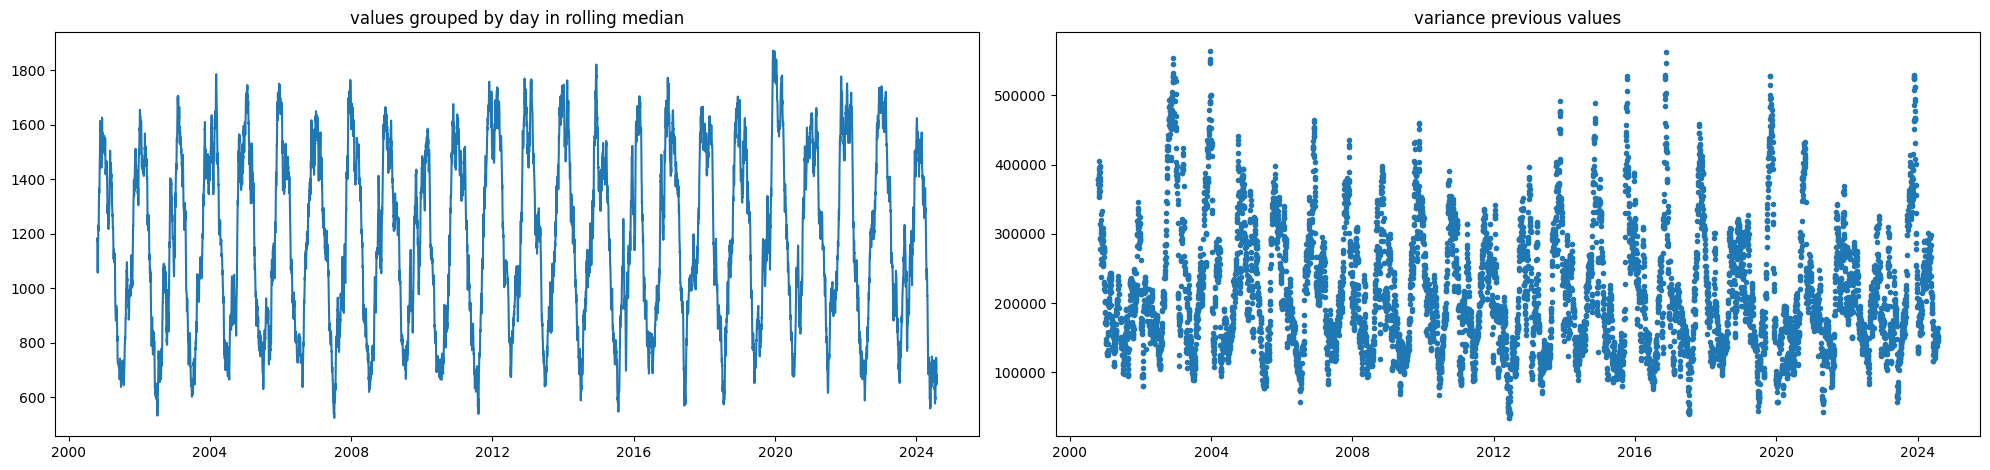

In [17]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(20)
cap = 2300

rolling = by_day.rolling(28)

ax[0].set_title(f"values grouped by day in rolling median")
ax[0].plot(rolling.mean()[target])

ax[1].set_title("variance previous values")
ax[1].plot(rolling[target].var(), ".")

plt.tight_layout()

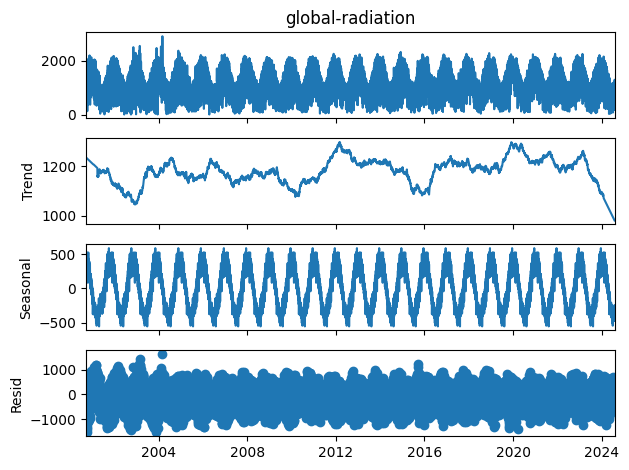

In [30]:
decompose_result = seasonal_decompose(
    by_day[target], model="additive", period=int(365), extrapolate_trend="freq"
)

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot()
plt.show()

<Axes: >

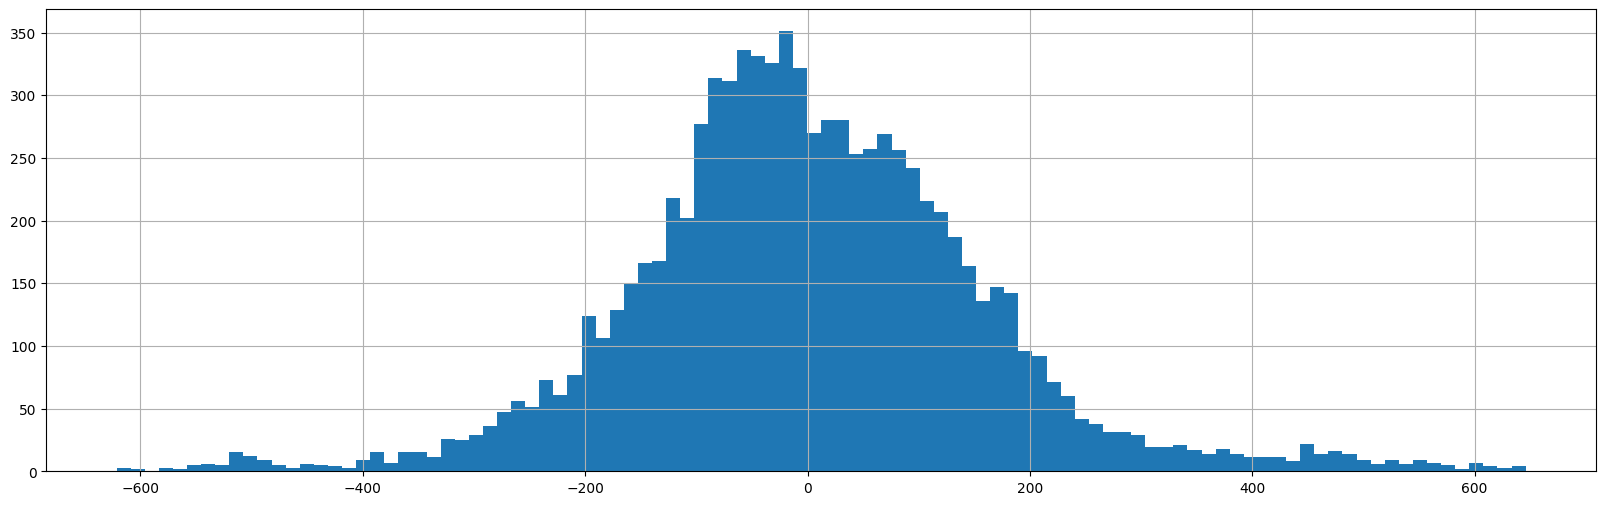

In [28]:
residual.hist(bins=100, figsize=FIGSIZE)